In [83]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

In [84]:
path = "C:\\Users\smart\Documents\Computer Vision\OCRecognition\myData"
test_size = 0.2
val_size = 0.2
dimension = (32,32, 3)
filter1 = (5,5)
filter2 = (3,3)
noOfFilter = 128
noOfNodes = 500

In [85]:
images = []
classes = []

myList = os.listdir(path)
noOfClasses = len(myList)
print("Total Number Of Class Detected : ", len(myList))

print('Importing Images ... ... ... ')
for x in range (0, noOfClasses):
    myPicList = os.listdir(path + '/' + str(x))
    for y in myPicList:
        curImg = cv2.imread(path + '/' + str(x) + '/' + y)
        curImg = cv2.resize(curImg, (32,32))
        images.append(curImg)
        classes.append(x)
    print(x, end = ' ')
print(" ")

Total Number Of Class Detected :  10
Importing Images ... ... ... 
0 1 2 3 4 5 6 7 8 9  


In [86]:
images = np.array(images)
classes = np.array(classes)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size = test_size)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = val_size)

In [88]:
noOfSamples = []

for x in range (0, noOfClasses):
    noOfSamples.append(len(np.where(y_train==x)[0]))
print(noOfSamples)

[657, 628, 660, 630, 669, 670, 640, 644, 657, 647]


<BarContainer object of 10 artists>

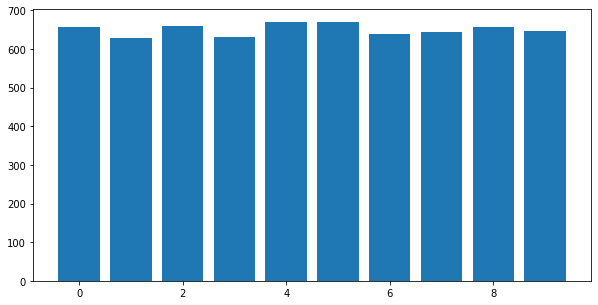

In [89]:
plt.figure(figsize = (10,5))
plt.bar(range(0, noOfClasses), noOfSamples)

In [90]:
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return  img

In [92]:
'''img = preProcessing(X_train[10])
img = cv2.resize(img, (dimension))
cv2.imshow('img',img)
cv2.waitKey(0)'''

"img = preProcessing(X_train[10])\nimg = cv2.resize(img, (dimension))\ncv2.imshow('img',img)\ncv2.waitKey(0)"

In [93]:
X_train = np.array(list(map(preProcessing, X_train)))
X_test = np.array(list(map(preProcessing, X_test)))
X_validation = np.array(list(map(preProcessing, X_validation)))

In [94]:
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(6502, 32, 32)
(2032, 32, 32)
(1626, 32, 32)


In [95]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)

In [96]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [97]:
datagen.fit(X_train)

In [98]:
y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)

In [99]:
model = Sequential()
model.add(Conv2D(noOfFilter, filter1, input_shape = (dimension[0], dimension[1], 1), activation = 'relu'))
model.add(Conv2D(noOfFilter, filter1, activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(noOfFilter//2, filter2, activation = 'relu'))
model.add(Conv2D(noOfFilter//2, filter2, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(noOfNodes, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(noOfClasses, activation = 'softmax'))

In [100]:
model.compile(optimizer = Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [101]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 64)        73792     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)        

In [103]:
model = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 50), steps_per_epoch = 2000, 
                            epochs = 10, validation_data = (X_validation, y_validation), shuffle = True)

AttributeError: 'History' object has no attribute 'fit_generator'